<h4><b>Pandas</b> (lib for data manipulation etc)</h4>
<h4><b>Numpy</b> (core of all DS libraries)</h4>
<h4><b>MatPlotLib</b> (for data visualisation)</h4>
<h4><b>Seaborn</b> (for advanced data visualisation)</h4>
<h4><b>Plotly</b> (for advanced data visualisation)</h4>
<h4><b>Scikit learn</b> (for ML)</h4>

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

<h4>Here is the main dataset initialized.</h4>

In [85]:
data = pd.read_csv('StudentPerformanceFactors.csv')

<h4>Dropped duplicates from dataset in line 1 (There were no duplicates). <br>
Dropped <b>229 records</b> with some empty fields in line 2. <br>
I also reset indexes, because after clearing the data, indexes remained the same. <br>
There are 3 columns with potentially boolean data types:
</h4>
<ul>
  <li>Extracurricular_Activities</li>
  <li>Internet_Access</li>
  <li>Learning_Disabilities</li>
</ul>
<h4>So I changed types from str -> bool</h4>

In [86]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

columns_to_map = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']
changing = {'Yes': True, 'No': False}
for col in columns_to_map:
    data[col] = data[col].map(changing)

<h4>That's how dataset looks after changes.</h4>

In [87]:
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,False,7,73,Low,True,0,Low,Medium,Public,Positive,3,False,High School,Near,Male,67
1,19,64,Low,Medium,False,8,59,Low,True,2,Medium,Medium,Public,Negative,4,False,College,Moderate,Female,61
2,24,98,Medium,Medium,True,7,91,Medium,True,2,Medium,Medium,Public,Neutral,4,False,Postgraduate,Near,Male,74
3,29,89,Low,Medium,True,8,98,Medium,True,1,Medium,Medium,Public,Negative,4,False,High School,Moderate,Male,71
4,19,92,Medium,Medium,True,6,65,Medium,True,3,Medium,High,Public,Neutral,4,False,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,25,69,High,Medium,False,7,76,Medium,True,1,High,Medium,Public,Positive,2,False,High School,Near,Female,68
6374,23,76,High,Medium,False,8,81,Medium,True,3,Low,High,Public,Positive,2,False,High School,Near,Female,69
6375,20,90,Medium,Low,True,6,65,Low,True,3,Low,Medium,Public,Negative,2,False,Postgraduate,Near,Female,68
6376,10,86,High,High,True,6,91,High,True,2,Low,Medium,Private,Positive,3,False,High School,Far,Female,68


<h4>
<code>data.info()</code> to check all fields' Dtypes, find non-nulls and column details <br>
<code>data.descibe()</code> to find all statistics about numeric columns.
</h4>

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   bool  
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   bool  
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   obje

In [89]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


<h4>
First of all, to start making hypothesis I need to see what correlates better with Exam Scores. <br>
Let's use <b>correlation matrix</b>.
</h4>

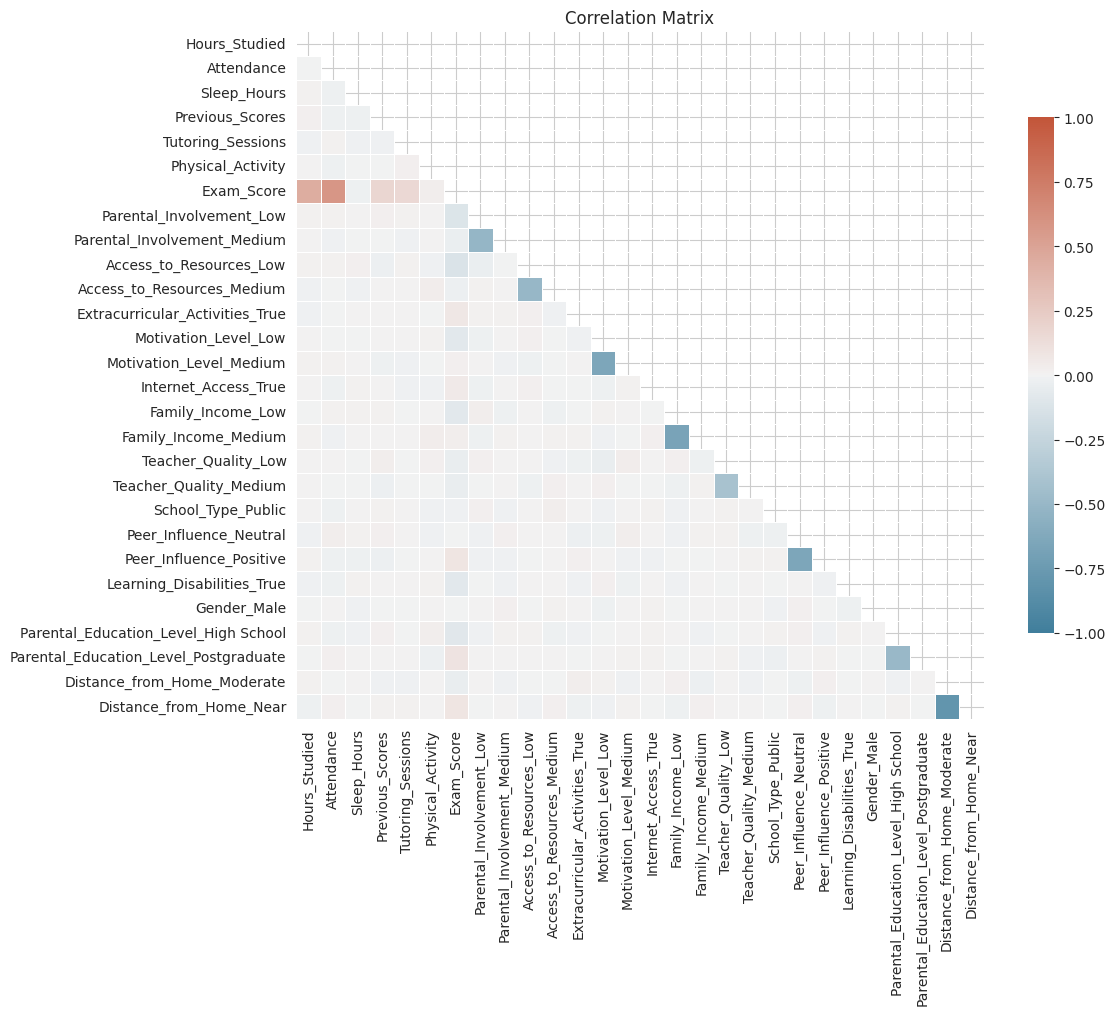

Correlations with Exam_Score:
Exam_Score                               1.000000
Attendance                               0.580259
Hours_Studied                            0.445104
Previous_Scores                          0.174283
Tutoring_Sessions                        0.156829
Parental_Education_Level_Postgraduate    0.092247
Distance_from_Home_Near                  0.081204
Peer_Influence_Positive                  0.080236
Extracurricular_Activities_True          0.063063
Internet_Access_True                     0.051124
Physical_Activity                        0.025148
Family_Income_Medium                     0.024922
Motivation_Level_Medium                  0.022508
Gender_Male                             -0.004932
Peer_Influence_Neutral                  -0.007472
School_Type_Public                      -0.010868
Sleep_Hours                             -0.017171
Access_to_Resources_Medium              -0.024579
Parental_Involvement_Medium             -0.036191
Teacher_Quality_Low 

In [90]:
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                       'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                       'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Gender',
                       'Parental_Education_Level', 'Distance_from_Home']

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
correlation_matrix = data_encoded.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .75},
    annot=False

)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

exam_score_correlation = correlation_matrix['Exam_Score'].sort_values(ascending=False)
print("Correlations with Exam_Score:")
print(exam_score_correlation)


<h4>
This code evaluates importance of factors which improve exam results. <br>
Starting from 5% importance, we can make our hypothesis about first 3 (maybe more for fun) columns. <br>
As I found, <b>Random Forest Regression</b> works better than correlation matrices because it can handle nonlinear relations better, <br> categorical columns, it also considers combintions of features, and its more resistant to noise. But in my case, result are almost the same.
</h4>

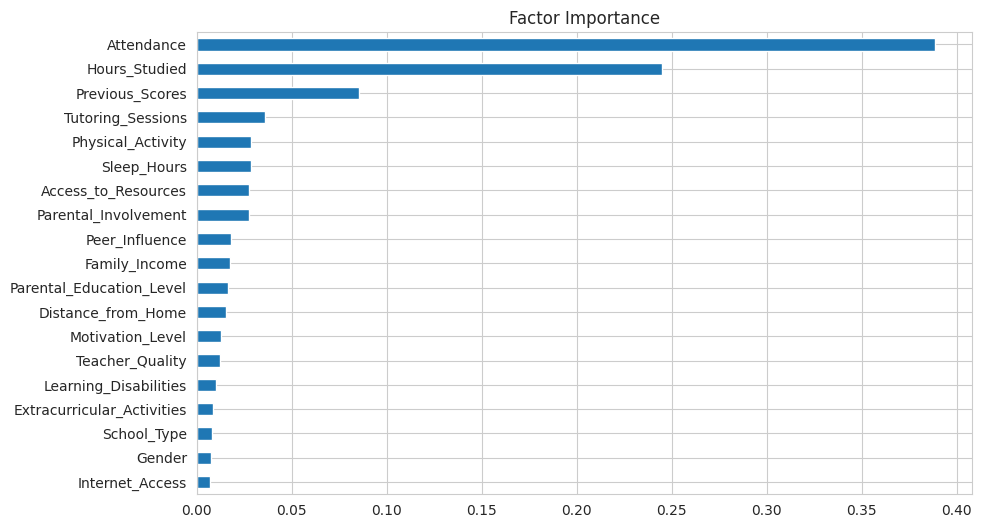

In [91]:
categorical_columns = [
    "Access_to_Resources",
    "Parental_Involvement",
    "Peer_Influence",
    "Family_Income",
    "Parental_Education_Level",
    "Distance_from_Home",
    "Motivation_Level",
    "Teacher_Quality",
    "Learning_Disabilities",
    "Extracurricular_Activities",
    "School_Type",
    "Gender",
    "Internet_Access"
]

tmp_data = data.copy()

for col in categorical_columns:
    # categorical -> numerical, transforms data, trains model
    tmp_data[col] = LabelEncoder().fit_transform(tmp_data[col])

X = tmp_data.drop("Exam_Score", axis=1)
y = tmp_data["Exam_Score"]

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

factor_importance = pd.Series(model.feature_importances_, index=X.columns)
factor_importance.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Factor Importance")
plt.show()


<h4>
I also want to be sure that data is real enough to make hypothesis <br>
or learn a model which predicts Exam score based on some most valuable factors. <br>
<br>
<b>Normal distribution</b> for exams scores proves it's reliability.<br>
<b>Flat distribution</b> for previous scores. But statistics are fine.<br>
<b>Flat distribution???</b> for attendance. Looks strange. <br>
<b>Normal distribution</b> for hours studied. <br>
<br>
Can't use <code>sns.displot()</code> here because it's a figure-level function

</h4>

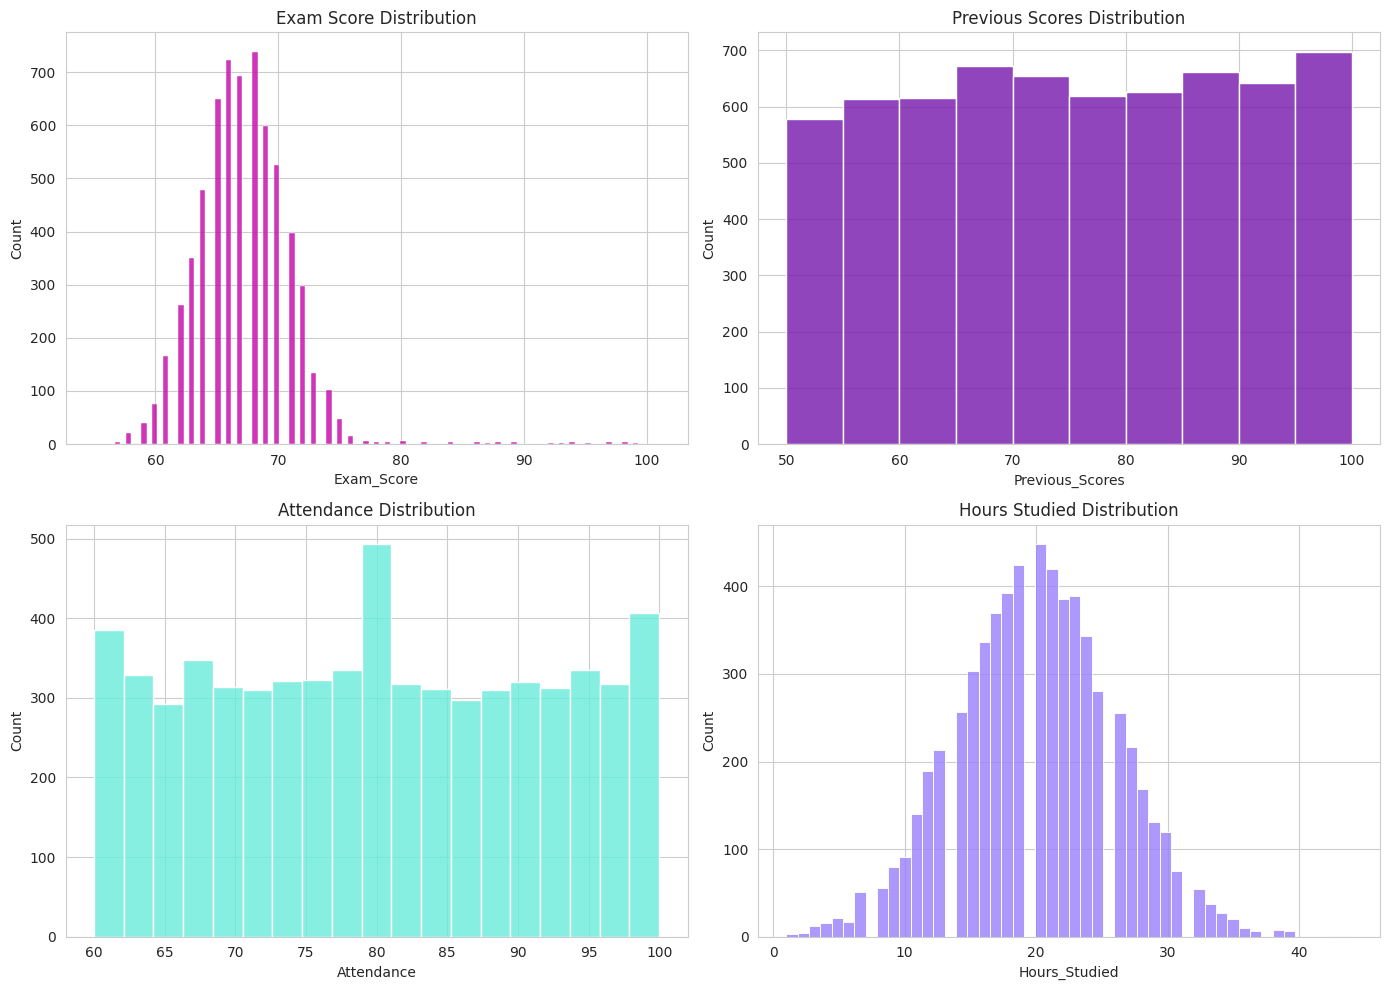

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(data=data, x='Exam_Score', alpha=0.8, color='#c505a7', ax=axes[0, 0])
axes[0, 0].set_title('Exam Score Distribution')

sns.histplot(data=data, x='Previous_Scores', alpha=0.8, color='#7617ac', bins=10, ax=axes[0, 1])
axes[0, 1].set_title('Previous Scores Distribution')

sns.histplot(data=data, x='Attendance', alpha=0.8, color='#68ecdb', ax=axes[1, 0])
axes[1, 0].set_title('Attendance Distribution')

sns.histplot(data=data, x='Hours_Studied', alpha=0.8, color='#9780fb', ax=axes[1, 1])
axes[1, 1].set_title('Hours Studied Distribution')

plt.tight_layout()
plt.show()


<h4>
Let's make rought attendance and study hours evaluation, for future comparisons.
</h4>

In [98]:
data['Attendance_Rough'] = pd.cut(
    data['Attendance'],
    bins=[0, 20, 40, 60, 80, 100],
    labels=['Bad', 'Poor', 'Fair', 'Good', 'Excellent'],
    right=True
)

data['Study_Hours_Rough'] = pd.cut(
    data['Hours_Studied'],
    bins=[0, 10, 20, 50],
    labels=['Low', 'Medium', 'High']
)


<h4>Rough Attendance distribution.</h4>

In [94]:
_tdata = data.Attendance_Rough.value_counts()

labels = _tdata.index
values = _tdata.values

go.Figure(data=[go.Pie(labels=labels, values=values)])

<h4>
Finally let's build large pairplot to see some dependencies
</h4>

<Figure size 1000x1000 with 0 Axes>

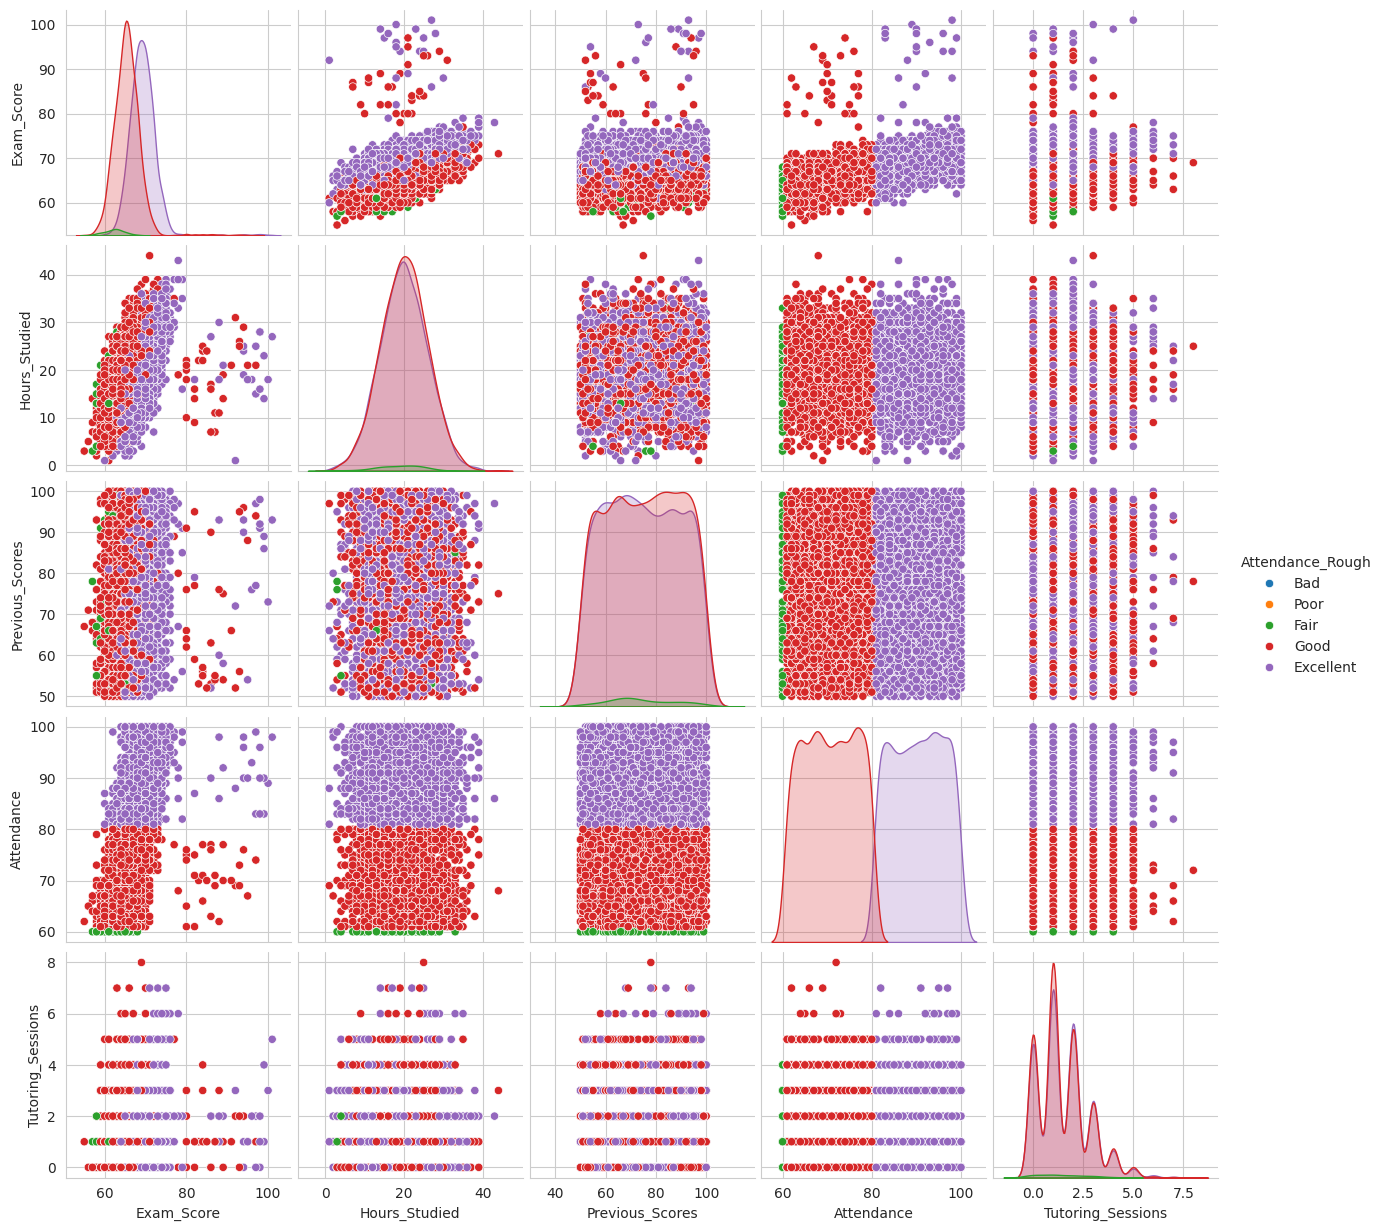

In [95]:
plt.figure(figsize=(10, 10))
sns.pairplot(data,
             vars=[
                 'Exam_Score',
                 'Hours_Studied',
                 'Previous_Scores',
                 'Attendance',
                 'Tutoring_Sessions'
             ],
             hue='Attendance_Rough',
             )
plt.show()

<h3>
From here we can compare most valuable factors and check some hypothesis.
</h3>

<h4>Simple line plot to show how hours affect the exam score.</h4>

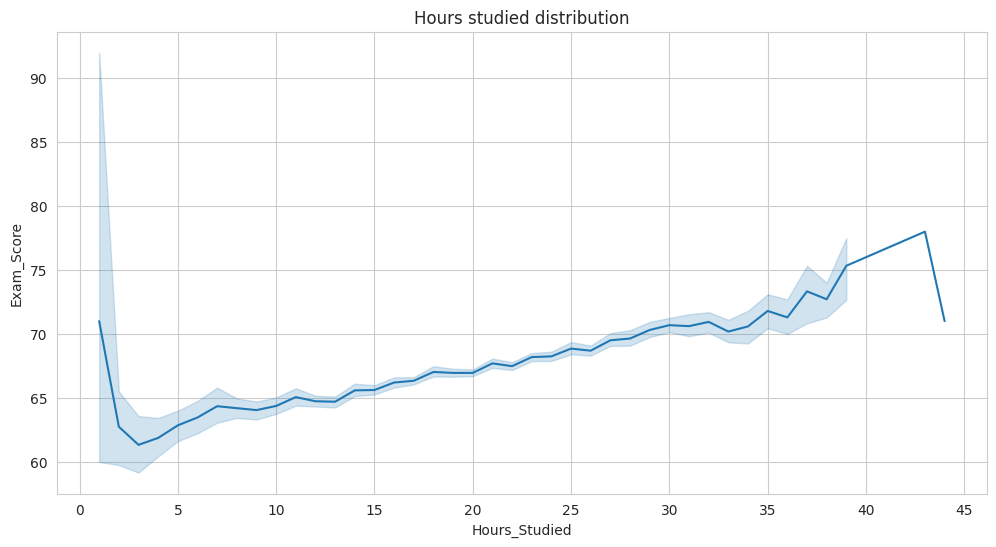

In [120]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Hours_Studied', y='Exam_Score')
plt.xticks(np.arange(0, 50, 5))
plt.title('Hours studied distribution')
plt.show()

<h4>I was interested if distance from home could lower sleep time and attendance.</h4>

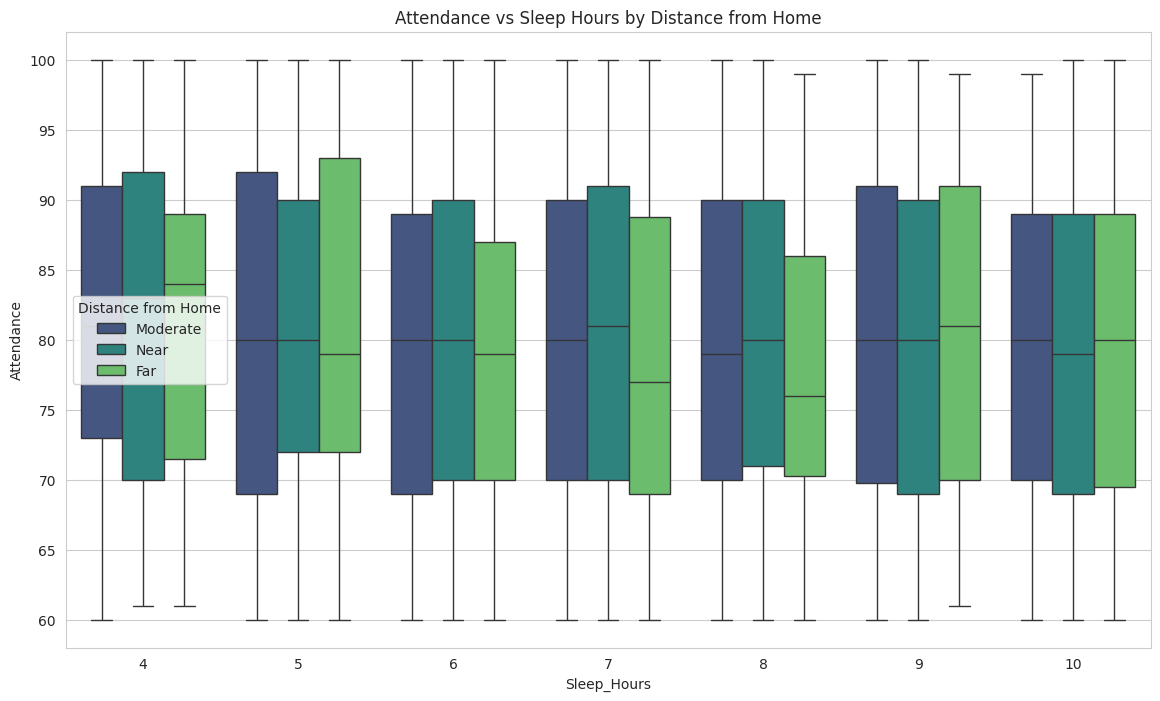

In [135]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='Sleep_Hours', y='Attendance', hue='Distance_from_Home', palette='viridis', dodge=True)
plt.title('Attendance vs Sleep Hours by Distance from Home')
plt.legend(title='Distance from Home')
plt.show()


<h4>Exam score upon attendance hue AtR. Looks like AtR matters.</h4>

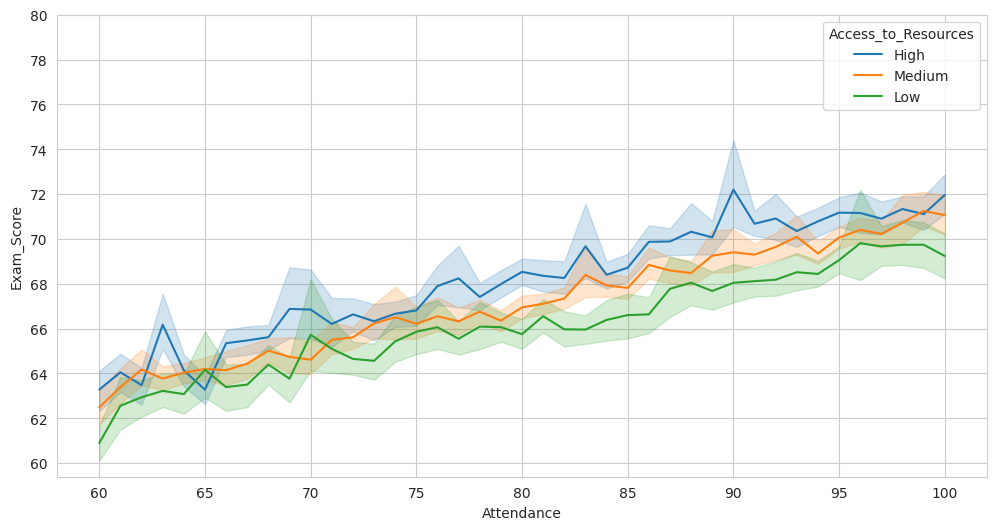

In [136]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Attendance', y='Exam_Score', hue='Access_to_Resources')
plt.yticks(np.arange(60, 80 + 1, 2))
plt.show()

<h4>Almost same plot, much easier to look at.</h4>

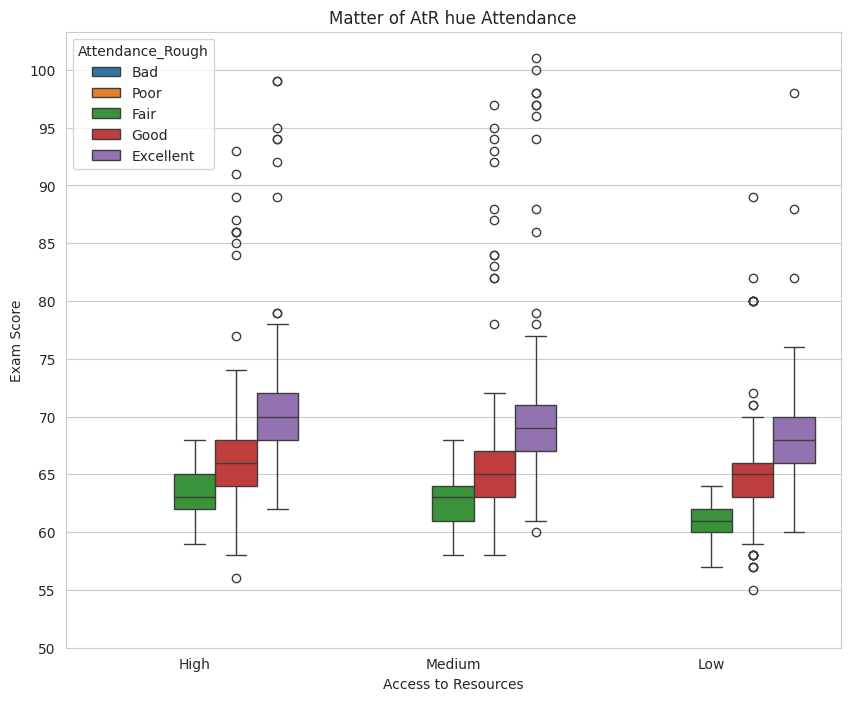

In [143]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x='Access_to_Resources', y='Exam_Score', hue='Attendance_Rough')
plt.yticks(np.arange(50, 100 + 1, 5))
plt.title('Matter of AtR hue Attendance')
plt.xlabel('Access to Resources')
plt.ylabel('Exam Score')
plt.show()

<h4>Number of Tutoring Sessions a month with Exam Score. Looks like 6-7 matter most.</h4>

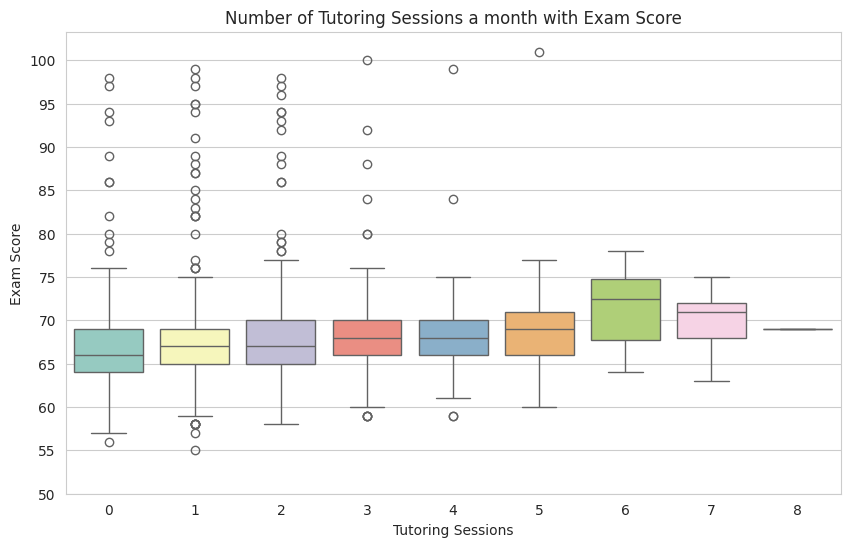

In [145]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tutoring_Sessions', y='Exam_Score', data=data, palette='Set3', hue='Tutoring_Sessions', legend=False)
plt.yticks(np.arange(50, 100 + 1, 5))
plt.xlabel('Tutoring Sessions')
plt.ylabel('Exam Score')
plt.title('Number of Tutoring Sessions a month with Exam Score')
plt.show()

<h4>
As seen from corr matrix these plot will not provide something usefull, <br>
but maybe postraguates parents are not more strict than other. Just a small thought.
</h4>

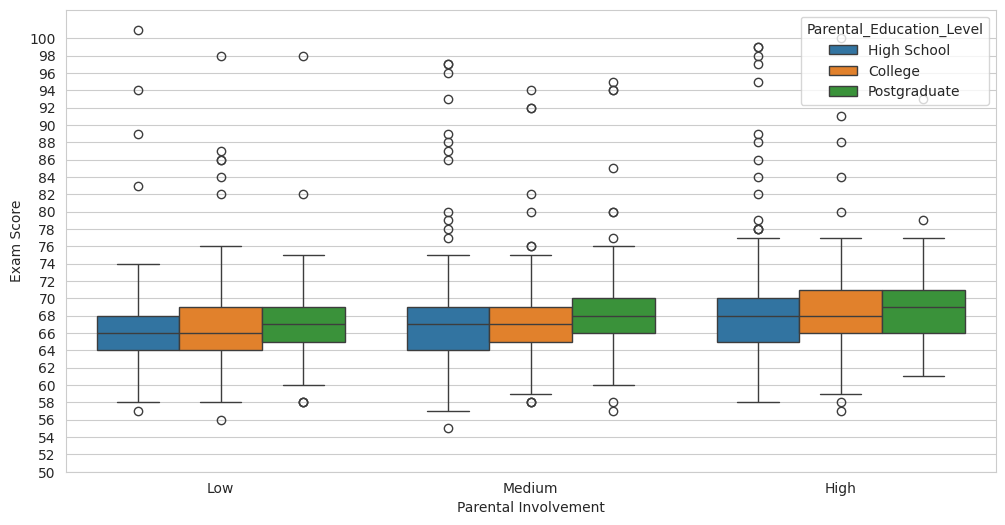

In [146]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="Parental_Involvement", y="Exam_Score", hue="Parental_Education_Level")
sns.color_palette('husl', as_cmap=True)
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.yticks(np.arange(50, 100 + 1, 2))
plt.show()

<h4>That plot is just beautiful rather than informative. Had to take fewer dataframe for this 3S scatterplot.</h4>

In [119]:
sampled_data = data.sample(n=500, random_state=42)
fig2 = px.scatter_3d(
    sampled_data,
    x='Attendance',
    y='Hours_Studied',
    z='Exam_Score',
    color='Exam_Score',
    size='Exam_Score',
    title="3D Plot: Key Factors vs Exam Score",
    labels={'Attendance': 'Attendance (%)', 'Hours_Studied': 'Study Hours', 'Previous_Scores': 'Previous Scores'}
)

fig2.update_layout(
    width=1200,
    height=800,
)

fig2.show()
